In [1]:
# Comparison of weather data from different weather monitoring stations (namely, Promice, S6 and B&B)

# Version of this script: v7 (last update: 05/12/2020)
# Author: Nuno Canha

# Goal of the script: 
# This script aims to combine 3 different weather datasets (with the parameters: dataset, temperature, relative humidity, 
# wind speed and wind direction) and compare them using plots and spearman correlations.
# This script uses datasets of three weather stations located at Greenland (S6, KAN_M and B&B). 
# The input files should be "csv" type, with hourly values (pre-treatment should be done if needed).

# Updates of current version:
# Timestamps of the input files were corrected to match

In [2]:
# Create a working folder and enter in it
# 1. To check the working folder:

In [3]:
pwd

'C:\\Users\\Nuno Canha\\Desktop\\Python\\Weather\\Converting other data\\S6 Vs KAN_M\\Matching times'

In [4]:
#2. If you are not in your working folder, enter in it using the command "cd"

In [5]:
cd C:\\Users\\Nuno Canha\\Desktop\\Python\\Weather\\Converting other data\\S6 Vs KAN_M\\Matching times

C:\Users\Nuno Canha\Desktop\Python\Weather\Converting other data\S6 Vs KAN_M\Matching times


In [6]:
# Upload the analysis packages
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Basic x-y plot: this command is for the graphs to appear in the notebook
%matplotlib inline

In [7]:
# Uploading of the different datasets

In [8]:
# Upload PROMICE data
# Your raw data file should be "csv" type.

In [9]:
data_KAN_M = pd.read_csv("KAN_M_Hourly_correct.csv", delimiter=";", na_values=['-999.0'])

# No values (-999.0) were replaced by NaN in order to not interfere with the analysis

# To visualise the dataset:
data_KAN_M

,Date,T - KAN_M,RH - KAN_M,WS - KAN_M,WD - KAN_M,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,01/06/2016 01:00,-8.11,90.1,8.68,157.4,NaN,NaN,NaN
1,01/06/2016 02:00,-8.27,91.1,8.88,161.3,NaN,NaN,NaN
2,01/06/2016 03:00,-7.98,96.5,7.72,167.3,NaN,NaN,NaN
3,01/06/2016 04:00,-7.20,98.0,6.56,181.7,NaN,NaN,NaN
4,01/06/2016 05:00,-7.24,98.0,5.34,180.9,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4411,31/08/2017 20:00,0.15,96.7,8.69,158.8,NaN,NaN,NaN
4412,31/08/2017 21:00,-0.14,97.2,7.66,172.3,NaN,NaN,NaN
4413,31/08/2017 22:00,-0.33,97.8,5.93,171.8,NaN,NaN,NaN
4414,31/08/2017 23:00,-0.42,98.1,5.44,174.1,NaN,NaN,NaN


In [10]:
# Converting timestamp of the dataset to date format:

# 1. Convert the collumn "Date" to date format:
data_KAN_M['Date'] = pd.to_datetime(data_KAN_M.Date, format='%d/%m/%Y %H:%M')

# 2. Convert date format to "datetime64":
data_KAN_M['Date'] = data_KAN_M['Date'].astype('datetime64')

# 3. Set "Date" as the index of the dataset:
data_KAN_M = data_KAN_M.set_index('Date')


# Delete unwanted collumns:
# Remark: the upload of the raw file provided empty collumns called "Unnamed", which should eliminated:
columns = ['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7']
data_KAN_M.drop(columns, inplace=True, axis=1)

# To visualise the dataset:
data_KAN_M

,T - KAN_M,RH - KAN_M,WS - KAN_M,WD - KAN_M
Date,,,,
2016-06-01 01:00:00,-8.11,90.1,8.68,157.4
2016-06-01 02:00:00,-8.27,91.1,8.88,161.3
2016-06-01 03:00:00,-7.98,96.5,7.72,167.3
2016-06-01 04:00:00,-7.20,98.0,6.56,181.7
2016-06-01 05:00:00,-7.24,98.0,5.34,180.9
...,...,...,...,...
2017-08-31 20:00:00,0.15,96.7,8.69,158.8
2017-08-31 21:00:00,-0.14,97.2,7.66,172.3
2017-08-31 22:00:00,-0.33,97.8,5.93,171.8


In [11]:
# To check a specific time interval, it is needed that "Date" is a collumn of the dataset and not the index (in this way, it is possible to select a timeframe).
# Therefore, to created a dataset with a specific timeframe, the following procedure should be adopted:

# 1. Reset the index so "Date" is a collumn of the dataset: 
data_KAN_M=data_KAN_M.reset_index()

# 2. Check the dataset:
data_KAN_M

,Date,T - KAN_M,RH - KAN_M,WS - KAN_M,WD - KAN_M
0,2016-06-01 01:00:00,-8.11,90.1,8.68,157.4
1,2016-06-01 02:00:00,-8.27,91.1,8.88,161.3
2,2016-06-01 03:00:00,-7.98,96.5,7.72,167.3
3,2016-06-01 04:00:00,-7.20,98.0,6.56,181.7
4,2016-06-01 05:00:00,-7.24,98.0,5.34,180.9
...,...,...,...,...,...
4411,2017-08-31 20:00:00,0.15,96.7,8.69,158.8
4412,2017-08-31 21:00:00,-0.14,97.2,7.66,172.3
4413,2017-08-31 22:00:00,-0.33,97.8,5.93,171.8
4414,2017-08-31 23:00:00,-0.42,98.1,5.44,174.1


In [12]:
# 3. Check the type of data in each collumn:

data_KAN_M.dtypes

# Remark:
# a. "datetime64[ns]" is the correct data format
# b. "float64" is the correct data format for values

Date          datetime64[ns]
T - KAN_M            float64
RH - KAN_M           float64
WS - KAN_M           float64
WD - KAN_M           float64
dtype: object

In [13]:
# How to create a sub-dataset with a selected timeframe:
# Example: from 30/05 – 02/07/2017

data2_KAN_M=data_KAN_M[(data_KAN_M['Date'] > '2017-05-30 00:00:00') & (data_KAN_M['Date'] < '2017-07-03 00:00:00')]
data2_KAN_M

,Date,T - KAN_M,RH - KAN_M,WS - KAN_M,WD - KAN_M
2208,2017-06-01 01:00:00,-5.05,87.4,3.90,119.0
2209,2017-06-01 02:00:00,-6.18,87.1,4.42,113.4
2210,2017-06-01 03:00:00,-7.00,86.6,4.62,113.4
2211,2017-06-01 04:00:00,-7.59,85.3,5.14,113.4
2212,2017-06-01 05:00:00,-8.02,83.1,5.86,115.8
...,...,...,...,...,...
2970,2017-07-02 19:00:00,-5.50,87.5,6.56,200.0
2971,2017-07-02 20:00:00,-5.48,89.3,5.41,187.9
2972,2017-07-02 21:00:00,-5.59,91.4,5.17,214.4
2973,2017-07-02 22:00:00,-6.45,92.6,3.13,208.5


In [14]:
# Upload S6 data

In [15]:
# Your raw data file should be "csv" type.

In [16]:
data_S6 = pd.read_csv("S6_Hourly.csv", delimiter=",", na_values=['-999.0'])

# No values (-999.0) were replaced by NaN in order to not interfere with the analysis

# To check the dataset:
data_S6

,Unnamed: 0,T - S6,RH - S6,WS - S6,WD - S6
0,NaN,mean,mean,mean,mean
1,Date,NaN,NaN,NaN,NaN
2,2017-05-30 01:00:00,-1.295,99.125,2.385,230.91500000000002
3,2017-05-30 02:00:00,-1.81,98.235,2.015,216.97500000000002
4,2017-05-30 03:00:00,-2.035,99.595,2.48,255.68
...,...,...,...,...,...
811,2017-07-02 18:00:00,-3.3,98.09,4.775,252.565
812,2017-07-02 19:00:00,-3.625,99.095,3.76,286.19
813,2017-07-02 20:00:00,-3.25,98.325,2.6,243.7
814,2017-07-02 21:00:00,-3.745,98.435,3.8150000000000004,248.485


In [17]:
# Data handling to obtain the correct and wanted format of the dataset: 

# 1. How to eliminate the index rows 0 and 1:
data1_S6=data_S6.drop(data_S6.index[[0,1]])

# 2. Change the collumn "Unnamed:0" to "Date"
data1_S6.rename(columns={'Unnamed: 0':'Date'},inplace=True)

# 3. Check the dataset:
data1_S6

,Date,T - S6,RH - S6,WS - S6,WD - S6
2,2017-05-30 01:00:00,-1.295,99.125,2.385,230.91500000000002
3,2017-05-30 02:00:00,-1.81,98.235,2.015,216.97500000000002
4,2017-05-30 03:00:00,-2.035,99.595,2.48,255.68
5,2017-05-30 04:00:00,-2.6550000000000002,99.815,1.7800000000000002,270.765
6,2017-05-30 05:00:00,-2.87,99.515,0.7,237.39499999999998
...,...,...,...,...,...
811,2017-07-02 18:00:00,-3.3,98.09,4.775,252.565
812,2017-07-02 19:00:00,-3.625,99.095,3.76,286.19
813,2017-07-02 20:00:00,-3.25,98.325,2.6,243.7
814,2017-07-02 21:00:00,-3.745,98.435,3.8150000000000004,248.485


In [18]:
# 4. Set the "Date" as index of the dataset:
data1_S6 = data1_S6.set_index('Date')
data1_S6

,T - S6,RH - S6,WS - S6,WD - S6
Date,,,,
2017-05-30 01:00:00,-1.295,99.125,2.385,230.91500000000002
2017-05-30 02:00:00,-1.81,98.235,2.015,216.97500000000002
2017-05-30 03:00:00,-2.035,99.595,2.48,255.68
2017-05-30 04:00:00,-2.6550000000000002,99.815,1.7800000000000002,270.765
2017-05-30 05:00:00,-2.87,99.515,0.7,237.39499999999998
...,...,...,...,...
2017-07-02 18:00:00,-3.3,98.09,4.775,252.565
2017-07-02 19:00:00,-3.625,99.095,3.76,286.19
2017-07-02 20:00:00,-3.25,98.325,2.6,243.7


In [19]:
# 5. Check the type of data in each collumn:
data1_S6.dtypes

T - S6     object
RH - S6    object
WS - S6    object
WD - S6    object
dtype: object

In [20]:
# 6.Convert the type of data for values of weather parameters (before: object; after: float)

data1_S6['T - S6'] = data1_S6['T - S6'].astype(float)
data1_S6['RH - S6'] = data1_S6['RH - S6'].astype(float)
data1_S6['WS - S6'] = data1_S6['WS - S6'].astype(float)
data1_S6['WD - S6'] = data1_S6['WD - S6'].astype(float)

data1_S6.dtypes

T - S6     float64
RH - S6    float64
WS - S6    float64
WD - S6    float64
dtype: object

In [21]:
# To merge datasets, it is necessary that the index collumn (the "Date", ie, timestamp) should be equal in both datasets.
# Remark: The merging will be done when the "Date" collumn match in both datasets.

# 1. Confirming timestamp in both datasets to be in the correct type (datetime64[ns]):

# 1.a. For that, it is necessary to reset the index of KAN_M dataset (in this case, this step was done previously, if not, then it should
# be used the following command:
# KAN_M_raw=data_KAN_M.reset_index()

# Either way, let's create the new datast "KAN_M_raw" as equal to "data_KAN_M" and check if the dataset has the "Date" collumn is already as reset as "index":
KAN_M_raw = data_KAN_M
KAN_M_raw

,Date,T - KAN_M,RH - KAN_M,WS - KAN_M,WD - KAN_M
0,2016-06-01 01:00:00,-8.11,90.1,8.68,157.4
1,2016-06-01 02:00:00,-8.27,91.1,8.88,161.3
2,2016-06-01 03:00:00,-7.98,96.5,7.72,167.3
3,2016-06-01 04:00:00,-7.20,98.0,6.56,181.7
4,2016-06-01 05:00:00,-7.24,98.0,5.34,180.9
...,...,...,...,...,...
4411,2017-08-31 20:00:00,0.15,96.7,8.69,158.8
4412,2017-08-31 21:00:00,-0.14,97.2,7.66,172.3
4413,2017-08-31 22:00:00,-0.33,97.8,5.93,171.8
4414,2017-08-31 23:00:00,-0.42,98.1,5.44,174.1


In [22]:
# 1.b. Check the type of data in each collumn for KAN_M dataset:
KAN_M_raw.dtypes

Date          datetime64[ns]
T - KAN_M            float64
RH - KAN_M           float64
WS - KAN_M           float64
WD - KAN_M           float64
dtype: object

In [23]:
# Same procedure to S6 dataset

# 1.c. Reset the index of S6 dataset
S6_raw=data1_S6.reset_index()
S6_raw

,Date,T - S6,RH - S6,WS - S6,WD - S6
0,2017-05-30 01:00:00,-1.295,99.125,2.385,230.915
1,2017-05-30 02:00:00,-1.810,98.235,2.015,216.975
2,2017-05-30 03:00:00,-2.035,99.595,2.480,255.680
3,2017-05-30 04:00:00,-2.655,99.815,1.780,270.765
4,2017-05-30 05:00:00,-2.870,99.515,0.700,237.395
...,...,...,...,...,...
809,2017-07-02 18:00:00,-3.300,98.090,4.775,252.565
810,2017-07-02 19:00:00,-3.625,99.095,3.760,286.190
811,2017-07-02 20:00:00,-3.250,98.325,2.600,243.700
812,2017-07-02 21:00:00,-3.745,98.435,3.815,248.485


In [24]:
# 1.d.1 Check the type of data in each collumn for S6 dataset:
S6_raw.dtypes

Date        object
T - S6     float64
RH - S6    float64
WS - S6    float64
WD - S6    float64
dtype: object

In [25]:
# Remark:
# In S6 dataset, "Date" is not in the date format (at the moment, it is considered as an "object") that is "datetime64[ns]". Therefore, it is needed to convert it to data format:
S6_raw['Date'] = S6_raw['Date'].astype('datetime64')

In [26]:
# 1.d.2 Check again the type of data in each collumn for S6 dataset to check if the format conversion worked:
S6_raw.dtypes

Date       datetime64[ns]
T - S6            float64
RH - S6           float64
WS - S6           float64
WD - S6           float64
dtype: object

In [27]:
# 1.e. Now that both datasets have "Date" collumn in the correct format, it is necessary to index this collumn:
S6_raw_1 = S6_raw.set_index('Date')
KAN_M_raw = KAN_M_raw.set_index('Date')

In [28]:
# 2. Merge both datasets
data = pd.merge(S6_raw_1, KAN_M_raw, on='Date')

# The merging will be done considering "Date" index. To check the final dataset:
data

,T - S6,RH - S6,WS - S6,WD - S6,T - KAN_M,RH - KAN_M,WS - KAN_M,WD - KAN_M
Date,,,,,,,,
2017-06-01 01:00:00,-3.320,86.550,5.135,162.965,-5.05,87.4,3.90,119.0
2017-06-01 02:00:00,-4.075,85.915,5.420,165.115,-6.18,87.1,4.42,113.4
2017-06-01 03:00:00,-4.505,84.570,5.510,165.555,-7.00,86.6,4.62,113.4
2017-06-01 04:00:00,-5.040,82.975,5.905,163.090,-7.59,85.3,5.14,113.4
2017-06-01 05:00:00,-5.200,79.970,6.935,163.375,-8.02,83.1,5.86,115.8
...,...,...,...,...,...,...,...,...
2017-07-02 18:00:00,-3.300,98.090,4.775,252.565,-5.48,86.4,6.89,187.8
2017-07-02 19:00:00,-3.625,99.095,3.760,286.190,-5.50,87.5,6.56,200.0
2017-07-02 20:00:00,-3.250,98.325,2.600,243.700,-5.48,89.3,5.41,187.9


In [29]:
# Uploading B&B data:
data_BB = pd.read_csv("BB_Hourly_correct.csv", delimiter=";", na_values=['-999.0','NA','0'])

# No values (-999.0) were replaced by NaN in order to not interfere with the analysis

data_BB

,Unnamed: 0,T - BB,RH - BB,WS - BB,WD - BB,Unnamed: 5,Unnamed: 6
0,NaN,mean,mean,mean,mean,NaN,NaN
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,03/06/2017 02:00,-3.635,74.6,6.24,141.0333333,NaN,NaN
3,03/06/2017 03:00,-4.171666667,73.66833333,6.263333333,138.95,NaN,NaN
4,03/06/2017 04:00,-4.255,71.785,6.56,138.05,NaN,NaN
...,...,...,...,...,...,...,...
621,28/06/2017 21:00,1.34,84.135,3.091666667,137.3166667,NaN,NaN
622,28/06/2017 22:00,1.051666667,84.58166667,3.213333333,137.7833333,NaN,NaN
623,28/06/2017 23:00,0.503333333,84.87333333,3.06,133.5833333,NaN,NaN
624,29/06/2017 00:00,-0.116666667,85.10833333,3.141666667,130.4,NaN,NaN


In [30]:
# Again, it is necessary to "clean" the dataset:
columns = ['Unnamed: 5', 'Unnamed: 6']
data_BB.drop(columns, inplace=True, axis=1)
data_BB

,Unnamed: 0,T - BB,RH - BB,WS - BB,WD - BB
0,NaN,mean,mean,mean,mean
1,Date,NaN,NaN,NaN,NaN
2,03/06/2017 02:00,-3.635,74.6,6.24,141.0333333
3,03/06/2017 03:00,-4.171666667,73.66833333,6.263333333,138.95
4,03/06/2017 04:00,-4.255,71.785,6.56,138.05
...,...,...,...,...,...
621,28/06/2017 21:00,1.34,84.135,3.091666667,137.3166667
622,28/06/2017 22:00,1.051666667,84.58166667,3.213333333,137.7833333
623,28/06/2017 23:00,0.503333333,84.87333333,3.06,133.5833333
624,29/06/2017 00:00,-0.116666667,85.10833333,3.141666667,130.4


In [31]:
Hourly_BB1=data_BB.drop(data_S6.index[[0,1]])
Hourly_BB1.rename(columns={'Unnamed: 0':'Date'},inplace=True)
Hourly_BB1['Date'] = pd.to_datetime(Hourly_BB1.Date, format='%d/%m/%Y %H:%M')
Hourly_BB1

,Date,T - BB,RH - BB,WS - BB,WD - BB
2,2017-06-03 02:00:00,-3.635,74.6,6.24,141.0333333
3,2017-06-03 03:00:00,-4.171666667,73.66833333,6.263333333,138.95
4,2017-06-03 04:00:00,-4.255,71.785,6.56,138.05
5,2017-06-03 05:00:00,-4.631666667,71.085,6.836666667,134.3
6,2017-06-03 06:00:00,-4.343333333,68.985,7.131666667,138.65
...,...,...,...,...,...
621,2017-06-28 21:00:00,1.34,84.135,3.091666667,137.3166667
622,2017-06-28 22:00:00,1.051666667,84.58166667,3.213333333,137.7833333
623,2017-06-28 23:00:00,0.503333333,84.87333333,3.06,133.5833333
624,2017-06-29 00:00:00,-0.116666667,85.10833333,3.141666667,130.4


In [32]:
# Check the data types:
Hourly_BB1.dtypes

# Remark: in this case, the values of weather parameters are considered as "object" and not numbers ("float")

Date       datetime64[ns]
T - BB             object
RH - BB            object
WS - BB            object
WD - BB            object
dtype: object

In [33]:
# Converting values to the correct format:
Hourly_BB1['T - BB'] = Hourly_BB1['T - BB'].astype(float)
Hourly_BB1['RH - BB'] = Hourly_BB1['RH - BB'].astype(float)
Hourly_BB1['WS - BB'] = Hourly_BB1['WS - BB'].astype(float)
Hourly_BB1['WD - BB'] = Hourly_BB1['WD - BB'].astype(float)
Hourly_BB1['Date'] = Hourly_BB1['Date'].astype('datetime64')
Hourly_BB1

,Date,T - BB,RH - BB,WS - BB,WD - BB
2,2017-06-03 02:00:00,-3.635000,74.600000,6.240000,141.033333
3,2017-06-03 03:00:00,-4.171667,73.668333,6.263333,138.950000
4,2017-06-03 04:00:00,-4.255000,71.785000,6.560000,138.050000
5,2017-06-03 05:00:00,-4.631667,71.085000,6.836667,134.300000
6,2017-06-03 06:00:00,-4.343333,68.985000,7.131667,138.650000
...,...,...,...,...,...
621,2017-06-28 21:00:00,1.340000,84.135000,3.091667,137.316667
622,2017-06-28 22:00:00,1.051667,84.581667,3.213333,137.783333
623,2017-06-28 23:00:00,0.503333,84.873333,3.060000,133.583333
624,2017-06-29 00:00:00,-0.116667,85.108333,3.141667,130.400000


In [34]:
# Check the data types:
Hourly_BB1.dtypes

Date       datetime64[ns]
T - BB            float64
RH - BB           float64
WS - BB           float64
WD - BB           float64
dtype: object

In [35]:
# Index the collum "Date" to the dataset:
Hourly_BB1 = Hourly_BB1.set_index('Date')
Hourly_BB1

,T - BB,RH - BB,WS - BB,WD - BB
Date,,,,
2017-06-03 02:00:00,-3.635000,74.600000,6.240000,141.033333
2017-06-03 03:00:00,-4.171667,73.668333,6.263333,138.950000
2017-06-03 04:00:00,-4.255000,71.785000,6.560000,138.050000
2017-06-03 05:00:00,-4.631667,71.085000,6.836667,134.300000
2017-06-03 06:00:00,-4.343333,68.985000,7.131667,138.650000
...,...,...,...,...
2017-06-28 21:00:00,1.340000,84.135000,3.091667,137.316667
2017-06-28 22:00:00,1.051667,84.581667,3.213333,137.783333
2017-06-28 23:00:00,0.503333,84.873333,3.060000,133.583333


In [36]:
# Create the final dataset with all 3 individual datasets (from the different weather stations)

In [37]:
# Merging the "data" dataset (already with info of S6 and KAN_M weather stations) with "Hourly_BB1", using "Date" as the commmun aggregator:

In [38]:
# Merge both datasets
data1 = pd.merge(data, Hourly_BB1, on='Date')

data1

,T - S6,RH - S6,WS - S6,WD - S6,T - KAN_M,RH - KAN_M,WS - KAN_M,WD - KAN_M,T - BB,RH - BB,WS - BB,WD - BB
Date,,,,,,,,,,,,
2017-06-03 02:00:00,-4.145,86.800,5.045,164.450,-5.42,83.8,5.63,111.6,-3.635000,74.600000,6.240000,141.033333
2017-06-03 03:00:00,-4.760,86.620,4.770,160.500,-5.28,79.8,7.16,109.5,-4.171667,73.668333,6.263333,138.950000
2017-06-03 04:00:00,-5.005,85.715,5.430,157.740,-6.05,80.2,7.15,126.4,-4.255000,71.785000,6.560000,138.050000
2017-06-03 05:00:00,-4.815,83.365,5.380,153.495,-7.39,83.8,5.48,110.5,-4.631667,71.085000,6.836667,134.300000
2017-06-03 06:00:00,-5.235,83.270,5.680,154.135,-7.59,81.6,5.69,107.6,-4.343333,68.985000,7.131667,138.650000
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 21:00:00,1.260,93.335,2.485,159.795,-0.81,90.4,1.82,121.1,1.340000,84.135000,3.091667,137.316667
2017-06-28 22:00:00,0.980,93.495,2.750,165.395,-1.34,91.4,1.71,124.7,1.051667,84.581667,3.213333,137.783333
2017-06-28 23:00:00,0.295,94.850,2.500,158.100,-2.07,92.8,1.72,122.9,0.503333,84.873333,3.060000,133.583333


In [39]:
# Plot of the time series of different weather data

In [40]:
# TEMPERATURE #

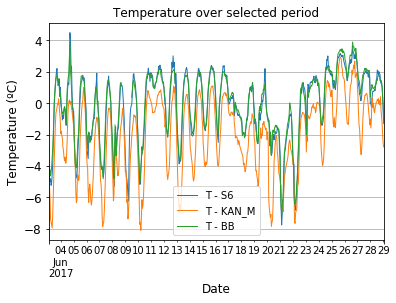

In [41]:
# Plot of the time series of Temperature data:

fig1 = data1['T - S6'].plot(linewidth=1, title ='Temperature over selected period')
fig1 = data1['T - KAN_M'].plot(linewidth=1)
fig1 = data1['T - BB'].plot(linewidth=1)
fig1.set_xlabel('Date',fontsize=12)
fig1.set_ylabel('Temperature (ºC)',fontsize=12)
fig1.grid(True)
fig1.legend()
fig1.tick_params(axis='x', labelsize=12 )
fig1.tick_params(axis='y', labelsize=12 )

# To save the figure
plt.savefig('Fig1 - Temperature over selected period')

# Bigger figure
plt.rcParams['figure.figsize'] = [18, 9]

# Remark: how to costumize graphs: https://matplotlib.org/tutorials/introductory/customizing.html

In [42]:
# RELATIVE HUMIDITY #

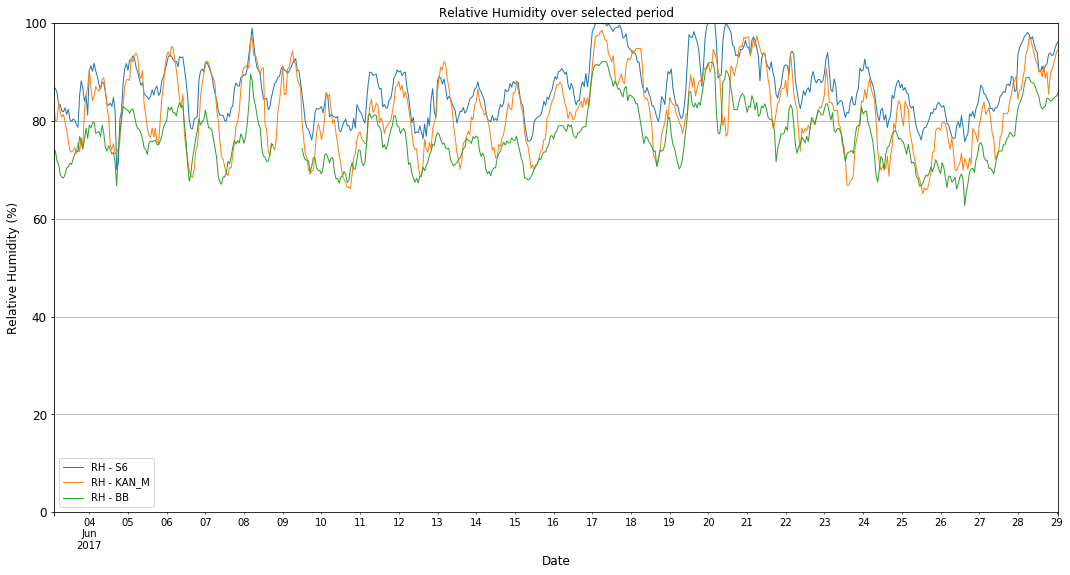

In [43]:
# Plot of the time series of Relative Humidity data:

fig2 = data1['RH - S6'].plot(linewidth=1, title ='Relative Humidity over selected period')
fig2 = data1['RH - KAN_M'].plot(linewidth=1)
fig2 = data1['RH - BB'].plot(linewidth=1)
fig2.set_xlabel('Date',fontsize=12)
fig2.set_ylabel('Relative Humidity (%)',fontsize=12)
fig2.set_ylim(0,100)
fig2.grid(True)
fig2.legend()
fig2.tick_params(axis='x', labelsize=12 )
fig2.tick_params(axis='y', labelsize=12 )

# To save the figure
plt.savefig('Fig2 - Relative Humidity over selected period')

# Bigger figure
plt.rcParams['figure.figsize'] = [18, 9]


# Remark: how to costumize graphs: https://matplotlib.org/tutorials/introductory/customizing.html

In [44]:
# WIND SPEED

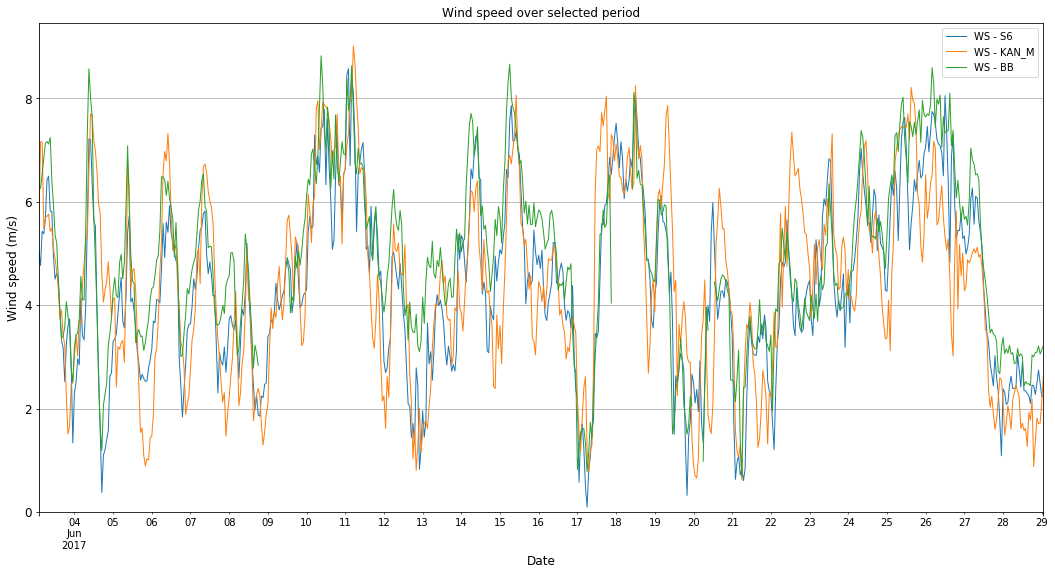

In [45]:
# Plot of the time series of Wind speed data:

fig3 = data1['WS - S6'].plot(linewidth=1, title ='Wind speed over selected period')
fig3 = data1['WS - KAN_M'].plot(linewidth=1)
fig3 = data1['WS - BB'].plot(linewidth=1)
fig3.set_xlabel('Date',fontsize=12)
fig3.set_ylabel('Wind speed (m/s)',fontsize=12)
fig3.set_ylim(0,)
fig3.grid(True)
fig3.legend()
fig3.tick_params(axis='x', labelsize=12 )
fig3.tick_params(axis='y', labelsize=12 )

# To save the figure
plt.savefig('Fig3 - Wind speed over selected period')

# Bigger figure
plt.rcParams['figure.figsize'] = [18, 9]

# Remark: how to costumize graphs: https://matplotlib.org/tutorials/introductory/customizing.html

In [46]:
# WIND DIRECTION

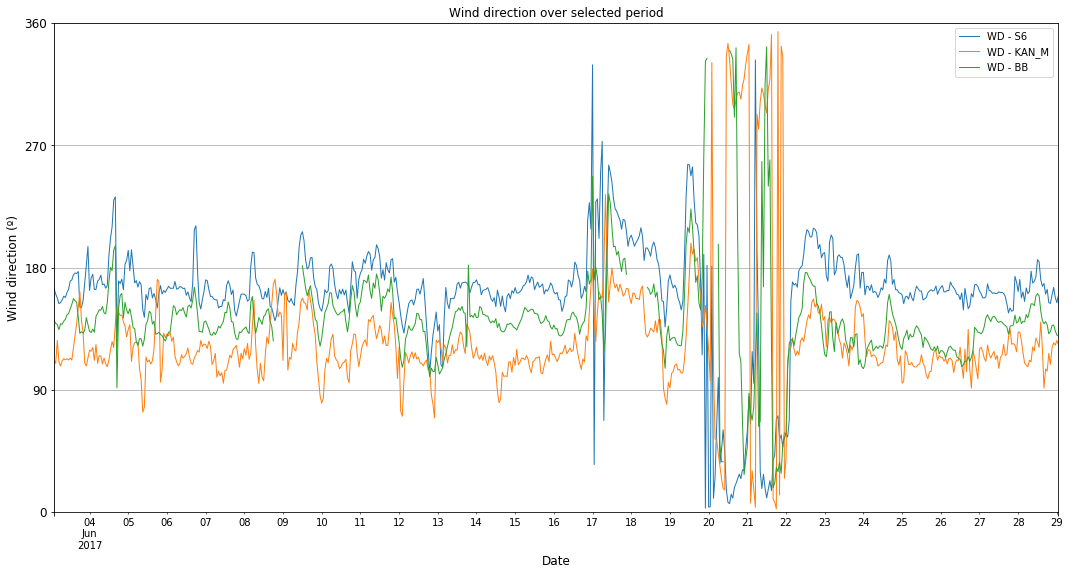

In [47]:
# Plot of the time series of Wind speed data:
import numpy as np

fig4 = data1['WD - S6'].plot(linewidth=1, title ='Wind direction over selected period')
fig4 = data1['WD - KAN_M'].plot(linewidth=1)
fig4 = data1['WD - BB'].plot(linewidth=1)
fig4.set_xlabel('Date',fontsize=12)
fig4.set_ylabel('Wind direction (º)',fontsize=12)
fig4.set_ylim(0,360)
plt.yticks(np.arange(0,361,90))
fig4.grid(True)
fig4.legend()
fig4.tick_params(axis='x', labelsize=12 )
fig4.tick_params(axis='y', labelsize=12 )

# To save the figure
plt.savefig('Fig4 - Wind direction over selected period')

# Bigger figure
plt.rcParams['figure.figsize'] = [18, 9]

# Remark: how to costumize graphs: https://matplotlib.org/tutorials/introductory/customizing.html

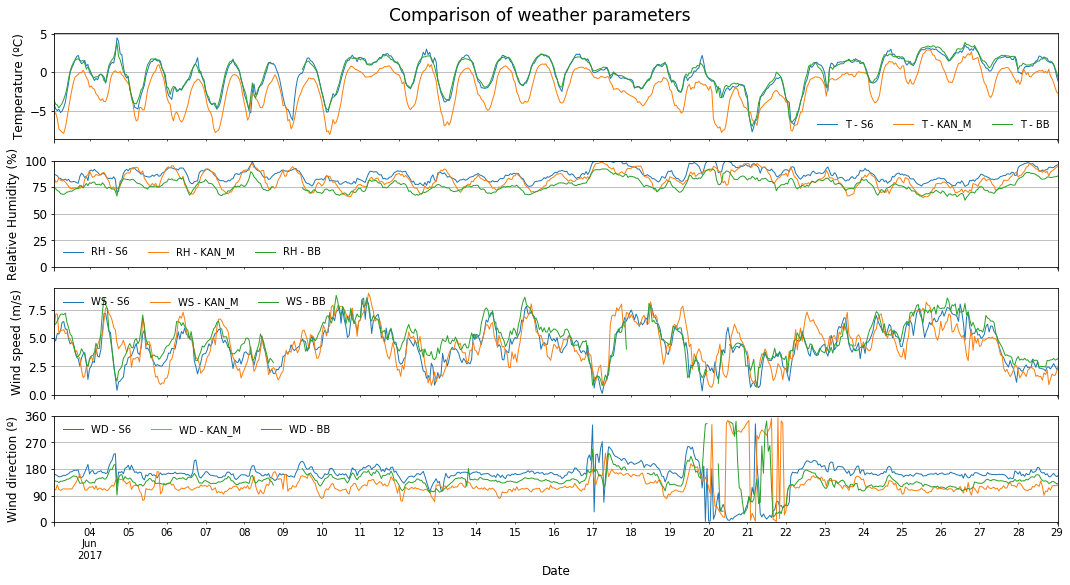

In [48]:
# Creating an integrated plot with all weather parameters:

import matplotlib.ticker as mtick

fig5,(ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
fig5.suptitle('Comparison of weather parameters', y=0.92,fontsize=17)

# To define the data for the plots (and which type):
data1[['T - S6','T - KAN_M','T - BB']].plot(linewidth=1, ax = ax1)
data1[['RH - S6','RH - KAN_M','RH - BB']].plot(linewidth=1, ax = ax2)
data1[['WS - S6','WS - KAN_M','WS - BB']].plot(linewidth=1, ax = ax3)
data1[['WD - S6','WD - KAN_M','WD - BB']].plot(linewidth=1, ax =ax4)

# Set up the 1st plot (ax1):
ax1.set_xlabel('Date',fontsize=12)
ax1.set_ylabel('Temperature (ºC)',fontsize=12)
ax1.grid(True)
ax1.legend(frameon=False, ncol=3)
ax1.tick_params(axis='x', labelsize=12 )
ax1.tick_params(axis='y', labelsize=12 )

# Set up the 2nd plot (ax2):
ax2.set_xlabel('Date',fontsize=12)
ax2.set_ylabel('Relative Humidity (%)',fontsize=12)
ax2.set_ylim(0,100)
ax2.grid(True)
ax2.legend(frameon=False, ncol=3)
ax2.tick_params(axis='x', labelsize=12 )
ax2.tick_params(axis='y', labelsize=12 )

# Set up the 3rd plot (ax3):
ax3.set_xlabel('Date',fontsize=12)
ax3.set_ylabel('Wind speed (m/s)',fontsize=12)
ax3.set_ylim(0,)
ax3.grid(True)
ax3.legend(frameon=False, ncol=3)
ax3.tick_params(axis='x', labelsize=12 )
ax3.tick_params(axis='y', labelsize=12 )

# Set up the 4th plot (ax4):
ax4.set_xlabel('Date',fontsize=12)
ax4.set_ylabel('Wind direction (º)',fontsize=12)
ax4.set_ylim(0,360)
plt.yticks(np.arange(0,361,90))
ax4.grid(True)
ax4.legend(frameon=False, ncol=3)
ax4.tick_params(axis='x', labelsize=12 )
ax4.tick_params(axis='y', labelsize=12 )

# To save the figure
plt.savefig('Fig5 - Comparison of weather parameters')

In [49]:
# To do correlation matrix using seaborn (applying Spearman correlation)

# Remark: The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets.

# Import seaborn
import seaborn as sns

In [50]:
# Create sub-datasets for each parameter

In [51]:
# Remove specific columns to create the wanted datasets
all_T = data1.drop(['RH - S6','WS - S6','WD - S6','RH - KAN_M','WS - KAN_M','WD - KAN_M','RH - BB','WS - BB','WD - BB'], axis = 1) 
all_RH = data1.drop(['T - S6','WS - S6','WD - S6','T - KAN_M','WS - KAN_M','WD - KAN_M','T - BB','WS - BB','WD - BB'], axis = 1) 
all_WS = data1.drop(['T - S6','RH - S6','WD - S6','T - KAN_M','RH - KAN_M','WD - KAN_M','T - BB','RH - BB','WD - BB'], axis = 1) 
all_WD = data1.drop(['T - S6','RH - S6','WS - S6','T - KAN_M','RH - KAN_M','WS - KAN_M','T - BB','RH - BB','WS - BB'], axis = 1) 

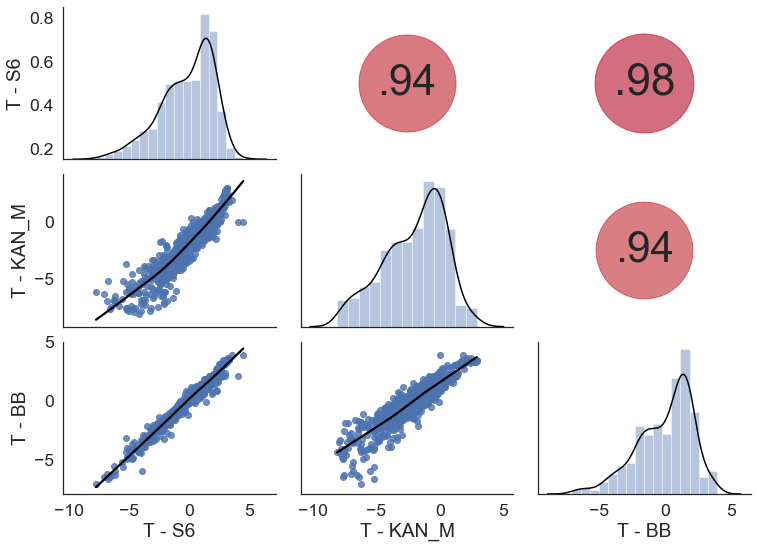

In [52]:
# Plot for Temperature

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'spearman')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(all_T, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

# Bigger figure
plt.rcParams['figure.figsize'] = [20, 10]

# To save the figure
plt.savefig('Fig6 - Temperature - Spearman correlations between datasets')

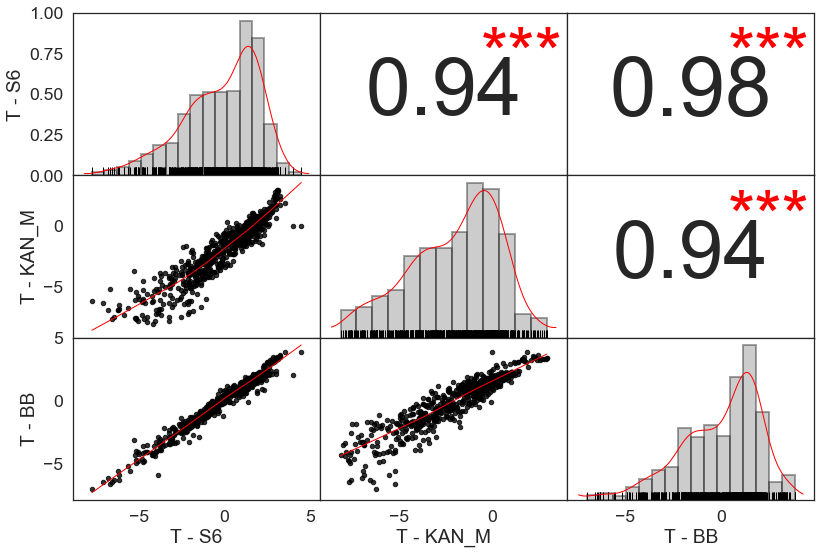

In [53]:
# Alternative visual for Temperature

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'spearman')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    font_size = abs(corr_r) * 80 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

def corrfunc(x, y, **kws):
    r, p = stats.spearmanr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate(p_stars, xy=(0.65, 0.6), xycoords=ax.transAxes,
                color='red', fontsize=70)

sns.set(style='white', font_scale=1.6)

g = sns.PairGrid(all_T, aspect=1.5, diag_sharey=False, despine=False)
g.map_lower(sns.regplot, lowess=True, ci=False,
            line_kws={'color': 'red', 'lw': 1},
            scatter_kws={'color': 'black', 's': 20})
g.map_diag(sns.distplot, color='black',
           kde_kws={'color': 'red', 'cut': 0.7, 'lw': 1},
           hist_kws={'histtype': 'bar', 'lw': 2,
                     'edgecolor': 'k', 'facecolor':'grey'})
g.map_diag(sns.rugplot, color='black')
g.map_upper(corrdot)
g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0, hspace=0)
  

plt.savefig('Fig6A - Temperature - Spearman correlations between datasets')

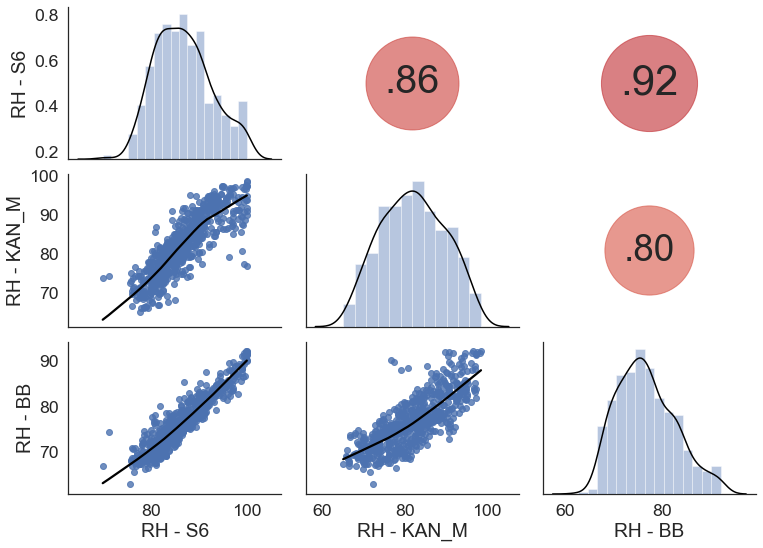

In [54]:
# Plot for Relative Humidity
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'spearman')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

f = sns.PairGrid(all_RH, aspect=1.4, diag_sharey=False)
f.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
f.map_diag(sns.distplot, kde_kws={'color': 'black'})
f.map_upper(corrdot)

plt.savefig('Fig7 - Relative Humidity - Spearman correlations between datasets')

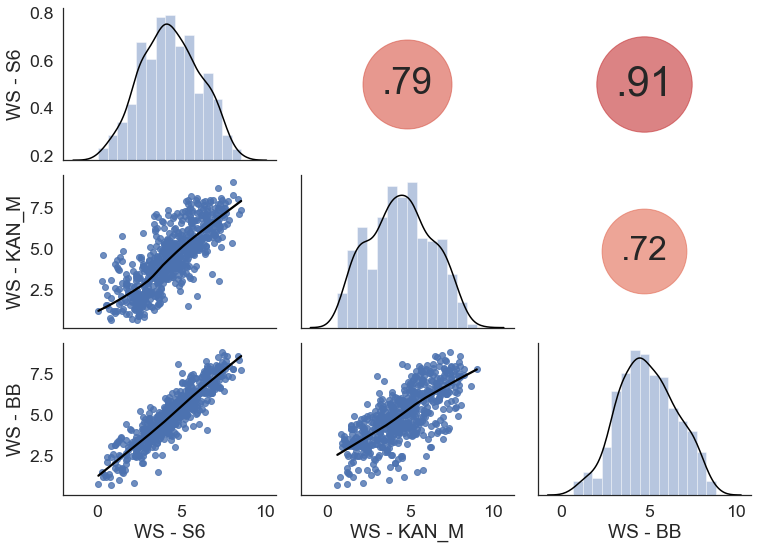

In [55]:
# Plot for Wind speed
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'spearman')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

f = sns.PairGrid(all_WS, aspect=1.4, diag_sharey=False)
f.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
f.map_diag(sns.distplot, kde_kws={'color': 'black'})
f.map_upper(corrdot)

plt.savefig('Fig8 - Wind speed - Spearman correlations between datasets')

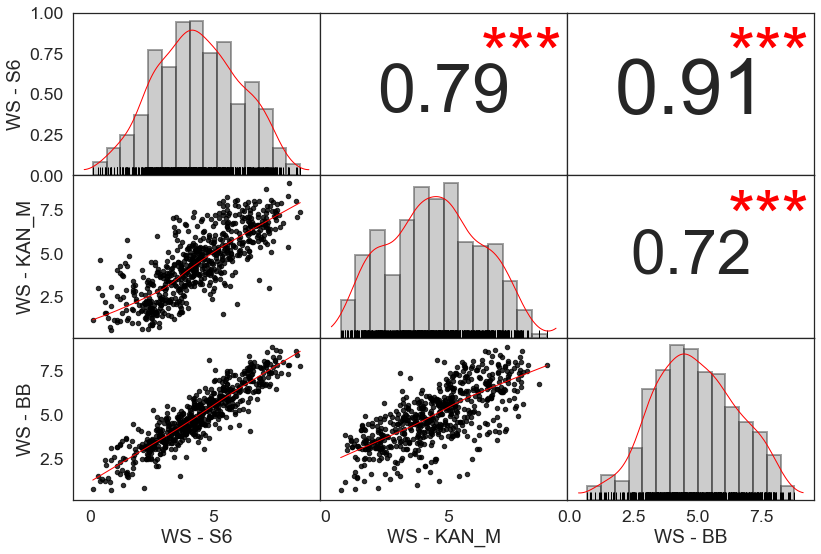

In [56]:
# Alternative visual for Wind Speed

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'spearman')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    font_size = abs(corr_r) * 80 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

def corrfunc(x, y, **kws):
    r, p = stats.spearmanr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate(p_stars, xy=(0.65, 0.6), xycoords=ax.transAxes,
                color='red', fontsize=70)

sns.set(style='white', font_scale=1.6)

g = sns.PairGrid(all_WS, aspect=1.5, diag_sharey=False, despine=False)
g.map_lower(sns.regplot, lowess=True, ci=False,
            line_kws={'color': 'red', 'lw': 1},
            scatter_kws={'color': 'black', 's': 20})
g.map_diag(sns.distplot, color='black',
           kde_kws={'color': 'red', 'cut': 0.7, 'lw': 1},
           hist_kws={'histtype': 'bar', 'lw': 2,
                     'edgecolor': 'k', 'facecolor':'grey'})
g.map_diag(sns.rugplot, color='black')
g.map_upper(corrdot)
g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0, hspace=0)


plt.savefig('Fig8A - Wind speed - Spearman correlations between datasets')

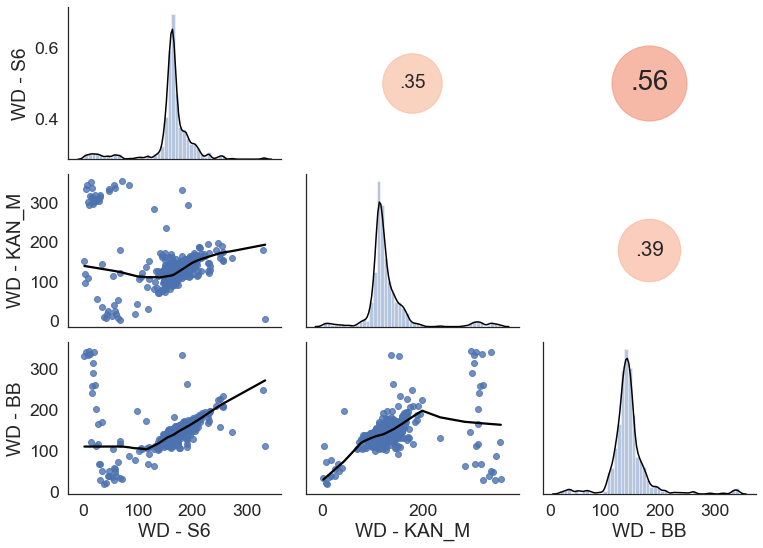

In [57]:
# Plot for Wind Direction

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'spearman')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

f = sns.PairGrid(all_WD, aspect=1.4, diag_sharey=False)
f.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
f.map_diag(sns.distplot, kde_kws={'color': 'black'})
f.map_upper(corrdot)

plt.savefig('Fig9 - Wind direction - Spearman correlations between datasets')

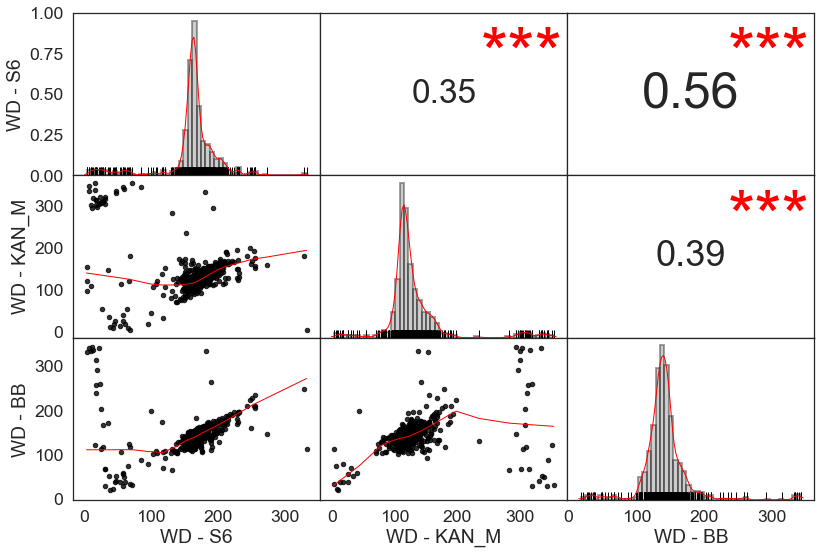

In [58]:
# Alternative visual for Wind Direction

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'spearman')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    font_size = abs(corr_r) * 80 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

def corrfunc(x, y, **kws):
    r, p = stats.spearmanr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate(p_stars, xy=(0.65, 0.6), xycoords=ax.transAxes,
                color='red', fontsize=70)

sns.set(style='white', font_scale=1.6)

g = sns.PairGrid(all_WD, aspect=1.5, diag_sharey=False, despine=False)
g.map_lower(sns.regplot, lowess=True, ci=False,
            line_kws={'color': 'red', 'lw': 1},
            scatter_kws={'color': 'black', 's': 20})
g.map_diag(sns.distplot, color='black',
           kde_kws={'color': 'red', 'cut': 0.7, 'lw': 1},
           hist_kws={'histtype': 'bar', 'lw': 2,
                     'edgecolor': 'k', 'facecolor':'grey'})
g.map_diag(sns.rugplot, color='black')
g.map_upper(corrdot)
g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0, hspace=0)


plt.savefig('Fig9A - Wind Direction - Spearman correlations between datasets')

In [59]:
# Comparison of mean values between weather stations

In [60]:
# Create the database for use with mean and sd values:
stats_T = all_T.describe()
Tstats_T = stats_T.transpose()
Tstats1_T = Tstats_T.reset_index()
Index_T = Tstats1_T['index']
Mean_T = Tstats1_T['mean']
Std_T = Tstats1_T['std']

stats_RH = all_RH.describe()
Tstats_RH = stats_RH.transpose()
Tstats1_RH = Tstats_RH.reset_index()
Index_RH = Tstats1_RH['index']
Mean_RH = Tstats1_RH['mean']
Std_RH = Tstats1_RH['std']

stats_WS = all_WS.describe()
Tstats_WS = stats_WS.transpose()
Tstats1_WS = Tstats_WS.reset_index()
Index_WS = Tstats1_WS['index']
Mean_WS = Tstats1_WS['mean']
Std_WS = Tstats1_WS['std']

stats_WD = all_WD.describe()
Tstats_WD = stats_WD.transpose()
Tstats1_WD = Tstats_WD.reset_index()
Index_WD = Tstats1_WD['index']
Mean_WD = Tstats1_WD['mean']
Std_WD = Tstats1_WD['std']

Index_WD1=Index_WD
Index_WD1=Index_WD1.replace(['WD - S6'],'S6')
Index_WD1=Index_WD1.replace(['WD - KAN_M'],'KAN_M')
Index_WD1=Index_WD1.replace(['WD - BB'],'BB')

Index_WD1

0       S6
1    KAN_M
2       BB
Name: index, dtype: object

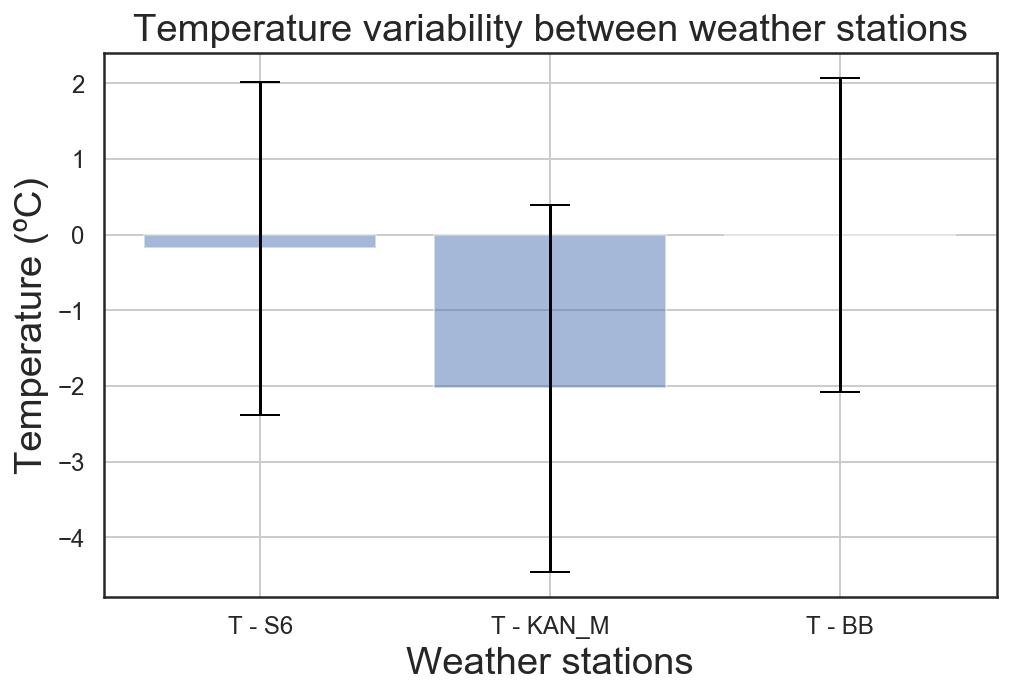

In [61]:
# Build the plot - Temperature comparison between weather stations
fig, ax = plt.subplots(figsize=(8, 5), dpi=144)
plt.rcParams['figure.figsize'] = [18, 9]
ax.bar(Index_T, Mean_T, yerr=Std_T, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_xticks(Index_T)
ax.yaxis.grid(True)

ax.set_title('Temperature variability between weather stations')
ax.set_xlabel('Weather stations')
ax.set_ylabel('Temperature (ºC)')

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(True)

# To save the figure
plt.savefig('Fig10 - Temperature comparison between weather stations')

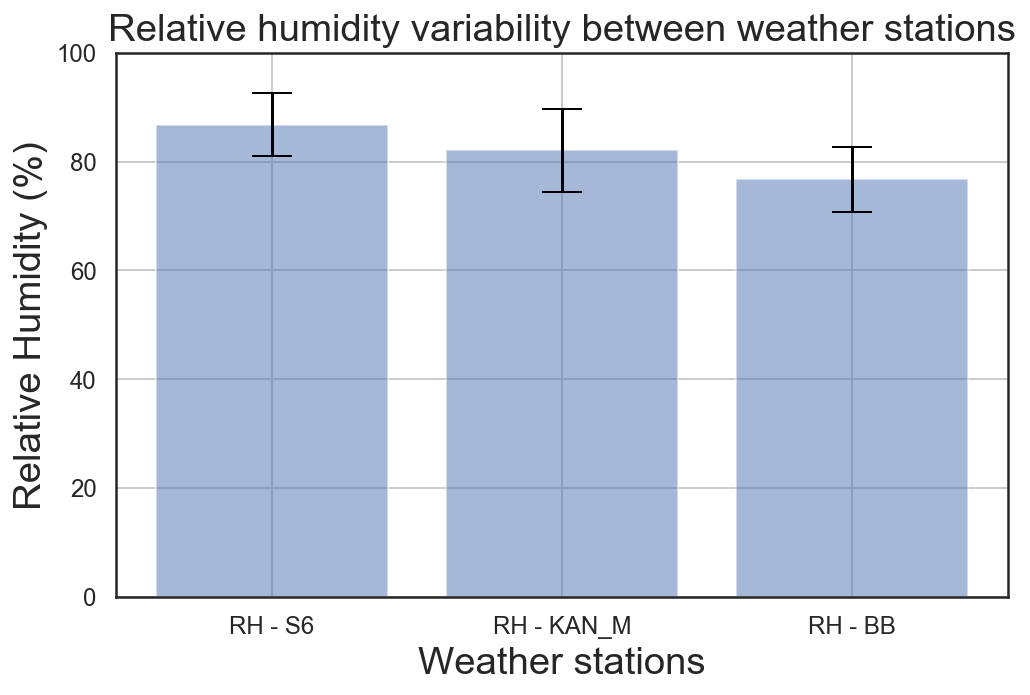

In [62]:
# Build the plot - Relative Humidity comparison between weather stations
fig, ax = plt.subplots(figsize=(8, 5), dpi=144)
plt.rcParams['figure.figsize'] = [9, 4]
ax.bar(Index_RH, Mean_RH, yerr=Std_RH, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_xticks(Index_RH)
ax.yaxis.grid(True)

ax.set_title('Relative humidity variability between weather stations')
ax.set_xlabel('Weather stations')
ax.set_ylabel('Relative Humidity (%)')

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_ylim(0,100)
ax.grid(True)

# To save the figure
plt.savefig('Fig11 - Relative Humidity comparison between weather stations')

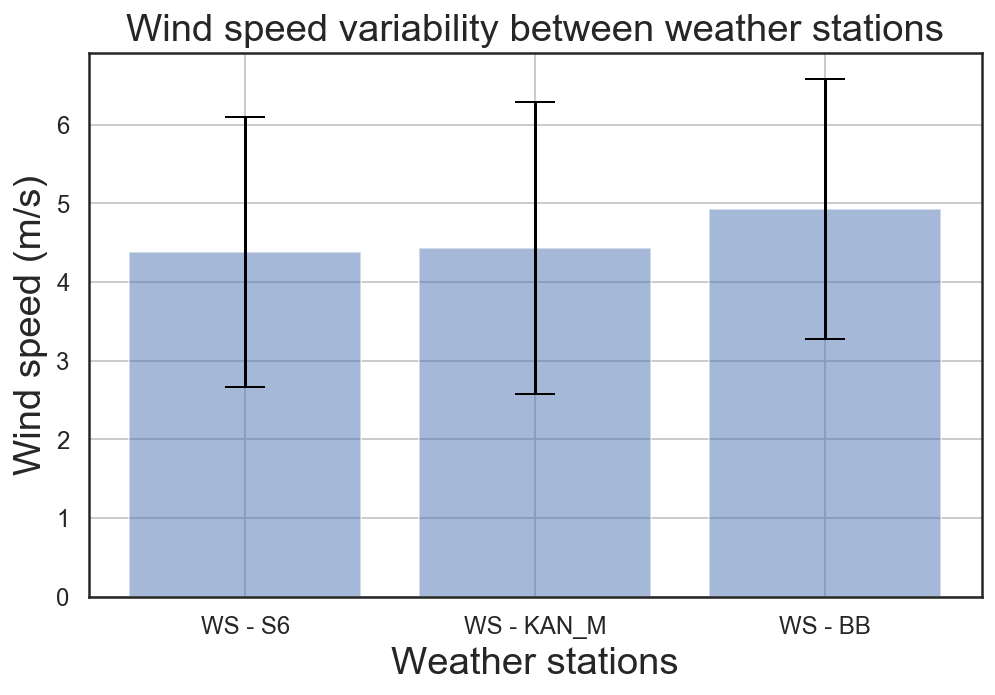

In [63]:
# Build the plot - Wind speed comparison between weather stations
fig, ax = plt.subplots(figsize=(8, 5), dpi=144)
plt.rcParams['figure.figsize'] = [9, 4]
ax.bar(Index_WS, Mean_WS, yerr=Std_WS, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_xticks(Index_WS)
ax.yaxis.grid(True)

ax.set_title('Wind speed variability between weather stations')
ax.set_xlabel('Weather stations')
ax.set_ylabel('Wind speed (m/s)')

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_ylim(0,)
ax.grid(True)

# To save the figure
plt.savefig('Fig12 - Wind speed comparison between weather stations')

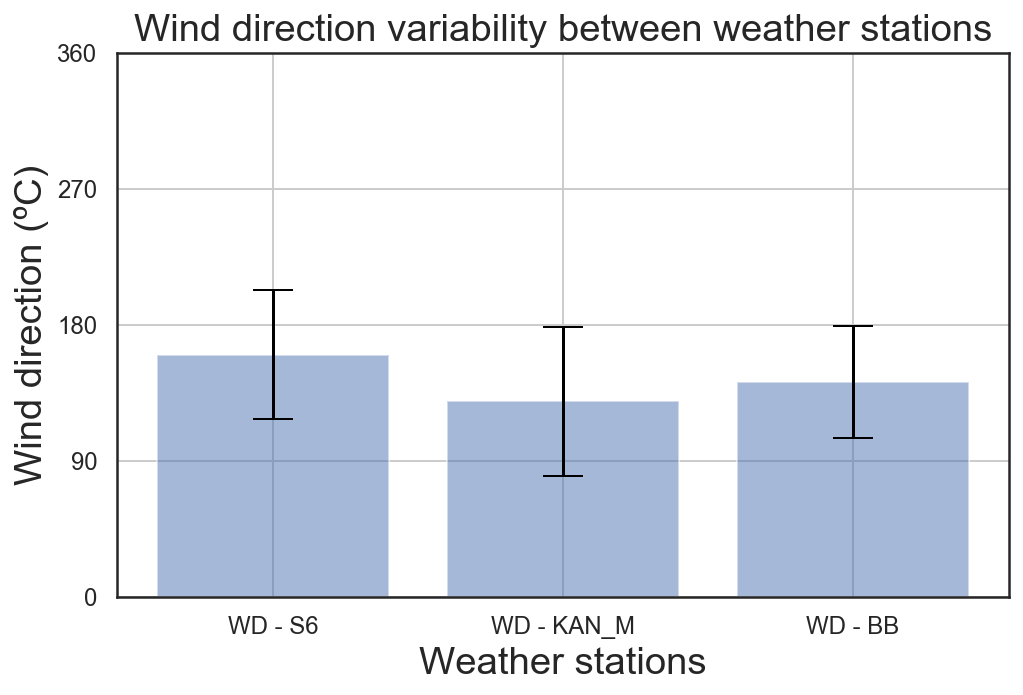

In [64]:
# Build the plot - Wind direction comparison between weather stations
fig, ax = plt.subplots(figsize=(8, 5), dpi=144)
plt.rcParams['figure.figsize'] = [9, 4]
ax.bar(Index_WD, Mean_WD, yerr=Std_WD, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_xticks(Index_WD)
ax.yaxis.grid(True)

ax.set_title('Wind direction variability between weather stations')
ax.set_xlabel('Weather stations')
ax.set_ylabel('Wind direction (ºC)')

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_ylim(0,360)
plt.yticks(np.arange(0,361,90))
ax.grid(True)

# To save the figure
plt.savefig('Fig13 - Wind direction comparison between weather stations')

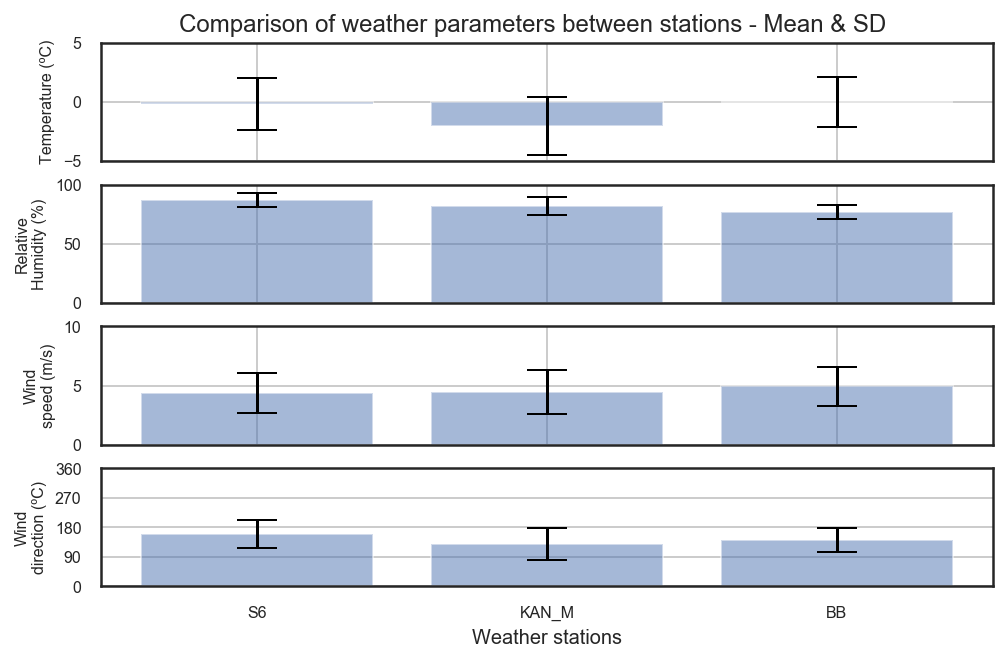

In [65]:
# Creating an integrated plot with all weather parameters:

import matplotlib.ticker as mtick

fig,(ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True,figsize=(8, 5), dpi=144)
fig.suptitle('Comparison of weather parameters between stations - Mean & SD', y=0.92,fontsize=12)

ax1.bar(Index_T, Mean_T, yerr=Std_T, align='center', alpha=0.5, ecolor='black', capsize=10)
ax1.set_xticks(Index_T)
ax1.yaxis.grid(True)
ax1.set_ylabel('Temperature (ºC)', fontsize=8)
ax1.tick_params(axis='y', labelsize=8)
ax1.set_ylim(-5,5)
ax1.grid(True)

ax2.bar(Index_RH, Mean_RH, yerr=Std_RH, align='center', alpha=0.5, ecolor='black', capsize=10)
ax2.set_xticks(Index_RH)
ax2.yaxis.grid(True)
ax2.set_ylabel('Relative\nHumidity (%)', fontsize=8)
ax2.tick_params(axis='y', labelsize=8)
ax2.set_ylim(0,100)
ax2.grid(True)

ax3.bar(Index_WS, Mean_WS, yerr=Std_WS, align='center', alpha=0.5, ecolor='black', capsize=10)
ax3.set_xticks(Index_WS)
ax3.yaxis.grid(True)
ax3.set_ylabel('Wind\nspeed (m/s)', fontsize=8)
ax3.tick_params(axis='y', labelsize=8)
ax3.set_ylim(0,10)
ax3.grid(True)

ax4.bar(Index_WD1, Mean_WD, yerr=Std_WD, align='center', alpha=0.5, ecolor='black', capsize=10)
ax4.set_xticks(Index_WD1)
ax4.yaxis.grid(True)
ax4.set_xlabel('Weather stations', fontsize=10)
ax4.set_ylabel('Wind\ndirection (ºC)', fontsize=8)
ax4.tick_params(axis='x', labelsize=8)
ax4.tick_params(axis='y', labelsize=8)
ax4.set_ylim(0,360)
plt.yticks(np.arange(0,361,90))
ax3.grid(True)

# To save the figure
plt.savefig('Fig14 - Comparison of weather parameters - Mean & SD')